# Life Expectancy project

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
### load the gapminder dataset
gapminder = pd.read_csv('https://raw.githubusercontent.com/thousandoaks/BEMM458/master/data/gapminder.tsv', sep='\t')

In [5]:
gapminder

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [6]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


### Visualise the data

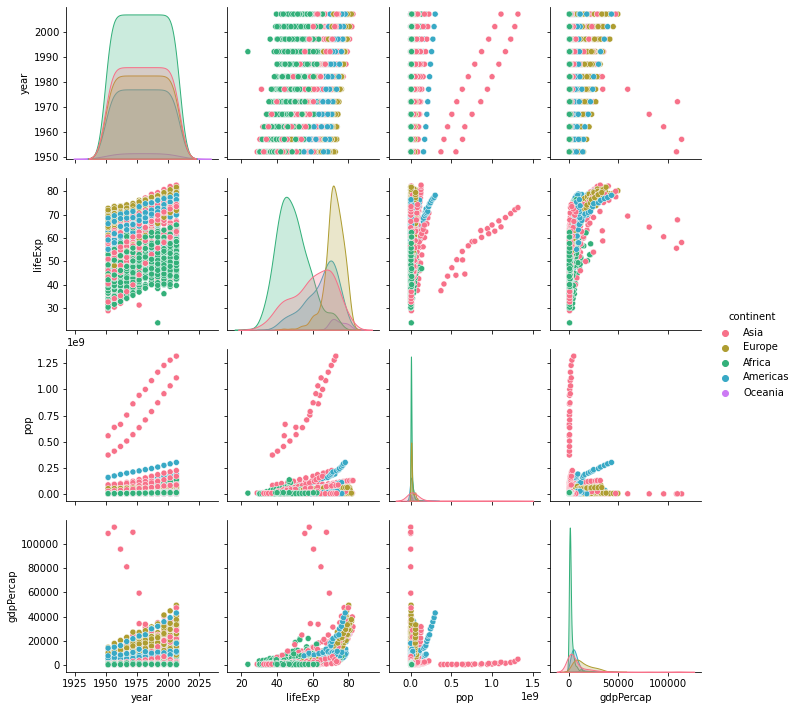

In [7]:
fig = sns.pairplot(gapminder, hue='continent', palette="husl")

We can see there are some highlight:
1. Asia has the largest population 
2. Africa has the lowest GDP per capita
3. The life expectancies have a high corelation with population, when the populations are repidly increase, the life expectancies also increase 
4. Europe tend to have the highest life expectancies, also Americas sit in 2nd. 

There are some outliers, especially on the data of gdp per cap in Asia countries. 
Also there are one Country in Africa life expectancies are obviously lower then others , we can also consider that as a outlier as well. 

### Filter the dataset to find rows in which life GDP per capita is greater than 60,000 

In [8]:
GDPFilter=gapminder['gdpPercap']>60000

In [9]:
gapminder[GDPFilter]

,country,continent,year,lifeExp,pop,gdpPercap
852,Kuwait,Asia,1952,55.565,160000,108382.35290
853,Kuwait,Asia,1957,58.033,212846,113523.13290
854,Kuwait,Asia,1962,60.470,358266,95458.11176
855,Kuwait,Asia,1967,64.624,575003,80894.88326
856,Kuwait,Asia,1972,67.712,841934,109347.86700


All the extreame GDP per capita data (outliars) are from Kuwait in 90s.  We can consider to removed the outliars.  After removing the outliers, the plots are still skewed to one side. Therefor, removing those values will not effect our analysis. 
We can also know the with higher GDP per capita, the life expectancies will also increase 


In [10]:
#Find the rows in the dataframe with the top 20 life expectancies
gapminder.sort_values(by=['lifeExp'], ascending=False).head(20)


,country,continent,year,lifeExp,pop,gdpPercap
803,Japan,Asia,2007,82.603,127467972,31656.06806
671,"Hong Kong, China",Asia,2007,82.208,6980412,39724.97867
802,Japan,Asia,2002,82.000,127065841,28604.59190
695,Iceland,Europe,2007,81.757,301931,36180.78919
1487,Switzerland,Europe,2007,81.701,7554661,37506.41907
670,"Hong Kong, China",Asia,2002,81.495,6762476,30209.01516
71,Australia,Oceania,2007,81.235,20434176,34435.36744
1427,Spain,Europe,2007,80.941,40448191,28821.06370
1475,Sweden,Europe,2007,80.884,9031088,33859.74835
767,Israel,Asia,2007,80.745,6426679,25523.27710


In [11]:
#Plot the evolution of life expectancy, population and GDP per capita of Kuwait

Kuwaitfilter= gapminder['country']=='Kuwait'
Kuwaitdf= gapminder[Kuwaitfilter]


In [13]:
Kuwaitdf

,country,continent,year,lifeExp,pop,gdpPercap
852,Kuwait,Asia,1952,55.565,160000,108382.35290
853,Kuwait,Asia,1957,58.033,212846,113523.13290
854,Kuwait,Asia,1962,60.470,358266,95458.11176
855,Kuwait,Asia,1967,64.624,575003,80894.88326
856,Kuwait,Asia,1972,67.712,841934,109347.86700
857,Kuwait,Asia,1977,69.343,1140357,59265.47714
858,Kuwait,Asia,1982,71.309,1497494,31354.03573
859,Kuwait,Asia,1987,74.174,1891487,28118.42998
860,Kuwait,Asia,1992,75.190,1418095,34932.91959
861,Kuwait,Asia,1997,76.156,1765345,40300.61996


Text(0, 0.5, 'Life expectancy')

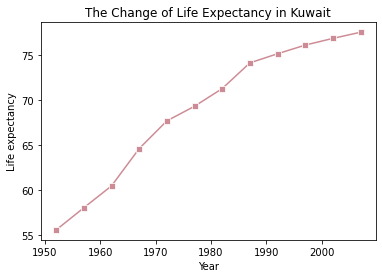

In [14]:
KuwaitLE=sns.lineplot(x=Kuwaitdf['year'],y=Kuwaitdf['lifeExp'],color='#CD8C95', marker='s')
KuwaitLE.set_title('The Change of Life Expectancy in Kuwait')
KuwaitLE.set_xlabel('Year')
KuwaitLE.set_ylabel('Life expectancy')

Text(0, 0.5, 'Population')

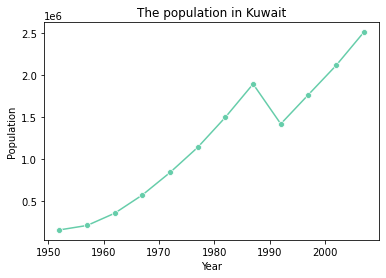

In [15]:
KuwaitPop=sns.lineplot(x=Kuwaitdf['year'],y=Kuwaitdf['pop'],color='#66CDAA', marker='o')
KuwaitPop.set_title('The population in Kuwait')
KuwaitPop.set_xlabel('Year')
KuwaitPop.set_ylabel('Population')

Text(0, 0.5, 'GDP per capita')

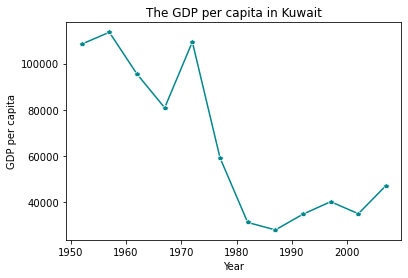

In [16]:
KuwaitGDP=sns.lineplot(x=Kuwaitdf['year'],y=Kuwaitdf['gdpPercap'],color='#00868B', marker='p')
KuwaitGDP.set_title('The GDP per capita in Kuwait')
KuwaitGDP.set_xlabel('Year')
KuwaitGDP.set_ylabel('GDP per capita')

### Visualise the distribution of GDP per capita of countries and life expectancy across the dataframe.

Text(0, 0.5, 'Life Expectancy')

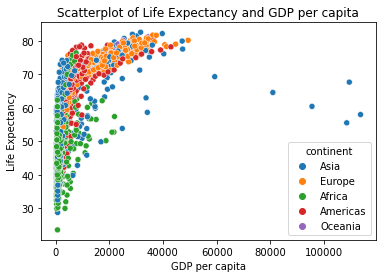

In [17]:
gapminderg = sns.scatterplot(x=gapminder['gdpPercap'], y=gapminder['lifeExp'] , hue=gapminder['continent'])
gapminderg.set_title('Scatterplot of Life Expectancy and GDP per capita');
gapminderg.set_xlabel('GDP per capita');
gapminderg.set_ylabel('Life Expectancy')

[(20.0, 100.0)]

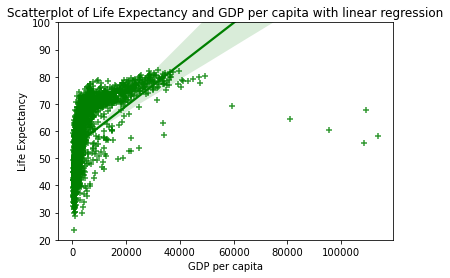

In [18]:
gapminderg = sns.regplot(x=gapminder['gdpPercap'], y=gapminder['lifeExp'],color='g', marker='+' )
gapminderg.set_title('Scatterplot of Life Expectancy and GDP per capita with linear regression');
gapminderg.set_xlabel('GDP per capita');
gapminderg.set_ylabel('Life Expectancy');
gapminderg.set(ylim=(20, 100))

Text(0, 0.5, 'Life Expectancy')

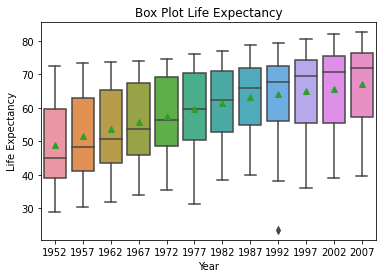

In [19]:
g1=sns.boxplot(x='year', y='lifeExp', showmeans=True, data=gapminder)
g1.set_title('Box Plot Life Expectancy');
g1.set_xlabel('Year');
g1.set_ylabel('Life Expectancy')

[(20.0, 100.0)]

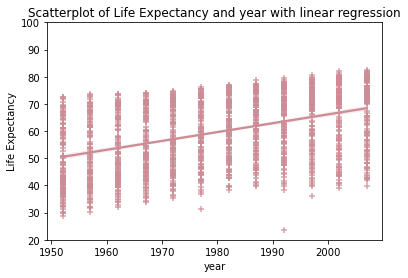

In [20]:
gapminderg = sns.regplot(x=gapminder['year'], y=gapminder['lifeExp'],color='#CD8C95', marker='+' )
gapminderg.set_title('Scatterplot of Life Expectancy and year with linear regression');
gapminderg.set_xlabel('year');
gapminderg.set_ylabel('Life Expectancy');
gapminderg.set(ylim=(20, 100))

### Visualise the distribution of change in life expectancy from 1952 to 2007.    


Text(0, 0.5, 'Life Expectancy')

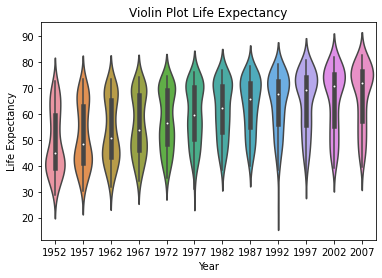

In [21]:
g1=sns.violinplot(x='year', y='lifeExp', showmeans=True, data=gapminder)
g1.set_title('Violin Plot Life Expectancy');
g1.set_xlabel('Year');
g1.set_ylabel('Life Expectancy')

###  Insight

From above we understand that :
1. Asia has the largest population
2. Africa has the lowest GDP per capita
3. The life expectancies have a high corelation with population, when the populations are repidly increase, the life expectancies also increase
4. Europe tend to have the highest life expectancies, also Americas sit in 2nd.
5. The median of Life expectancy gradually rise since 1952

We can also compare the data of 1952 & 2007 :


In [22]:
GDPEvolutionContinent=gapminder.groupby(['continent','year'])['gdpPercap'].mean()


<AxesSubplot:xlabel='year'>

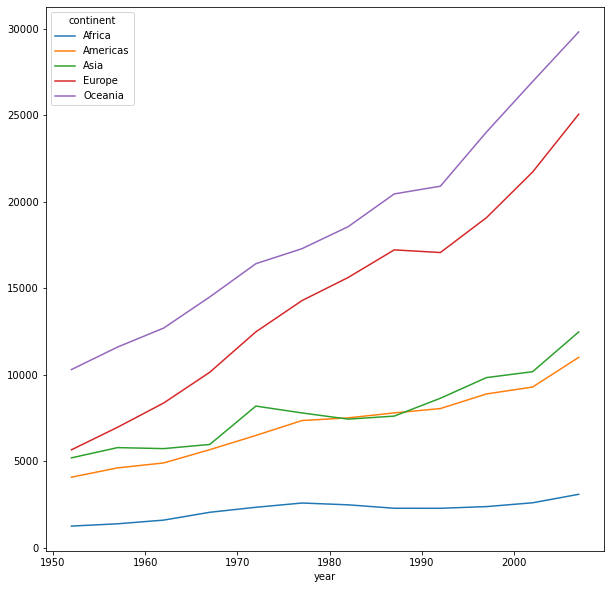

In [23]:
GDPEvolutionContinent.unstack(level=0).plot(kind='line',figsize=(10,10))


From above plot we can see there are still have big economic gap between continent, eventhough the Americas and Asia have double GDP per Capita increase accoss the years. Europe and Oceania both have triple growth.

In [24]:
df1962=gapminder['year']==1962

In [25]:
data1962=gapminder[df1962]

In [26]:
data1962

,country,continent,year,lifeExp,pop,gdpPercap
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
14,Albania,Europe,1962,64.820,1728137,2312.888958
26,Algeria,Africa,1962,48.303,11000948,2550.816880
38,Angola,Africa,1962,34.000,4826015,4269.276742
50,Argentina,Americas,1962,65.142,21283783,7133.166023
...,...,...,...,...,...,...
1646,Vietnam,Asia,1962,45.363,33796140,772.049160
1658,West Bank and Gaza,Asia,1962,48.127,1133134,2198.956312
1670,"Yemen, Rep.",Asia,1962,35.180,6120081,825.623201
1682,Zambia,Africa,1962,46.023,3421000,1452.725766


In [27]:
df2007=gapminder['year']==2007

In [28]:
data2007=gapminder[df2007]

In [29]:
data2007

,country,continent,year,lifeExp,pop,gdpPercap
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
23,Albania,Europe,2007,76.423,3600523,5937.029526
35,Algeria,Africa,2007,72.301,33333216,6223.367465
47,Angola,Africa,2007,42.731,12420476,4797.231267
59,Argentina,Americas,2007,75.320,40301927,12779.379640
...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404
1667,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906
1691,Zambia,Africa,2007,42.384,11746035,1271.211593


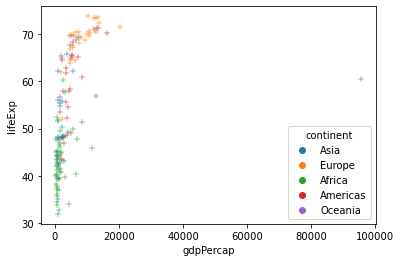

In [30]:
data1962fg = sns.scatterplot(x=data1962['gdpPercap'], y=data1962['lifeExp'],hue=data1962['continent'],color='g', marker='+' )

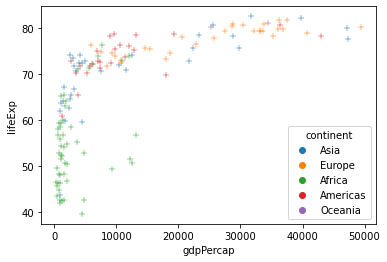

In [31]:
data2007fg = sns.scatterplot(x=data2007['gdpPercap'], y=data2007['lifeExp'],hue=data2007['continent'],color='g', marker='+' )

Compare these two Figure we can understand the changes more clearly. We can see that more asia country have higher gdp and life expectancies. The life expectancies top 1 in 2007 is conturebuit by a Asia country, instead of Euroupe. 

Although, Africa still on the bottom, but comper to 1962, the economy and life expectancies has been improved. Now , lets look further of data in 2007:

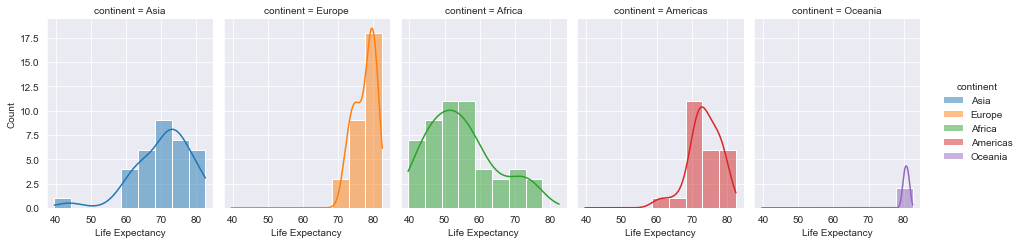

In [32]:
sns.set_style('darkgrid')

plot = sns.displot(data=data2007, x='lifeExp', kde=True, hue='continent', col='continent', height=3.5, aspect=.75)
sns.despine()

plot.set_axis_labels("Life Expectancy", "Count")
plt.show()

In 2007, Life expectancy is high in Oceania and Europe, with an average of 80 years, followed by the Americas and Asia, which are high but more evenly spread. 

Text(0.5, 0.98, 'World GDP and Life Expectancy in 2007')

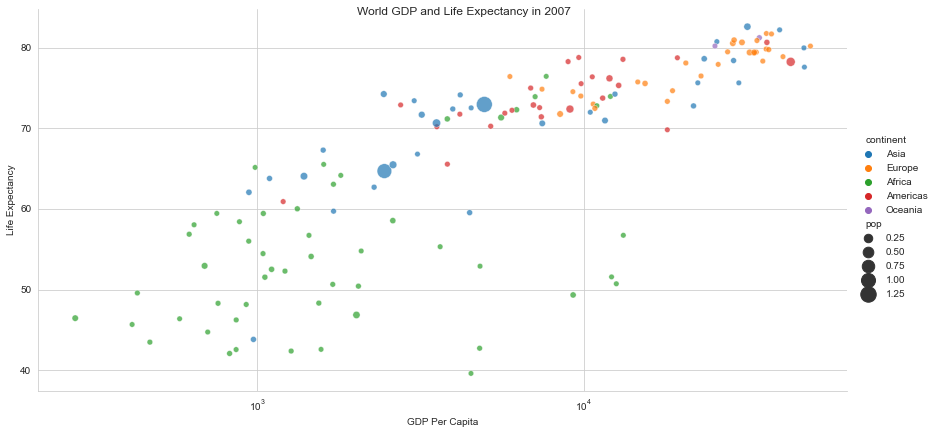

In [33]:
sns.set_style('whitegrid')
plot_2007 = sns.relplot(data=data2007, x='gdpPercap', y='lifeExp', hue='continent', size='pop', alpha=0.7, edgecolors="grey", linewidth=0.5, sizes=(30, 250), height=6, aspect=2).set(xscale="log")
plot_2007.set_axis_labels("GDP Per Capita", "Life Expectancy")
plot_2007.fig.suptitle('World GDP and Life Expectancy in 2007')

so, how it change: we can try to use the mean of life expectancy to analyze

In [34]:
lifeExp_m = gapminder.groupby(['continent', 'year']).mean()['lifeExp'].unstack(level=0)

In [35]:
lifeExp_m

continent,Africa,Americas,Asia,Europe,Oceania
year,,,,,
1952,39.135500,53.27984,46.314394,64.408500,69.2550
1957,41.266346,55.96028,49.318544,66.703067,70.2950
1962,43.319442,58.39876,51.563223,68.539233,71.0850
1967,45.334538,60.41092,54.663640,69.737600,71.3100
1972,47.450942,62.39492,57.319269,70.775033,71.9100
1977,49.580423,64.39156,59.610556,71.937767,72.8550
1982,51.592865,66.22884,62.617939,72.806400,74.2900
1987,53.344788,68.09072,64.851182,73.642167,75.3200
1992,53.629577,69.56836,66.537212,74.440100,76.9450


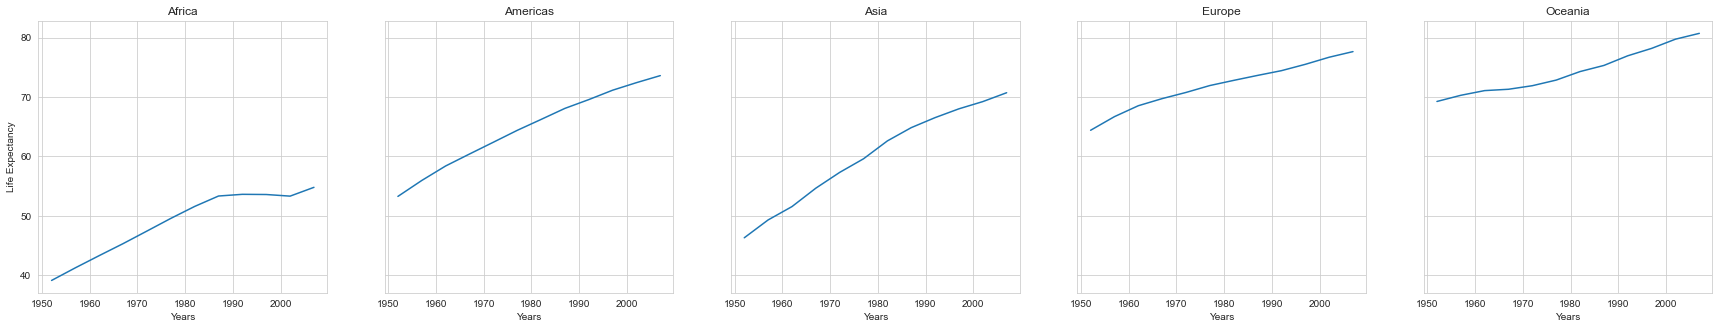

In [36]:
f, CH = plt.subplots(1, 5, figsize=(30, 5), sharey=True)

for i, x in enumerate(lifeExp_m.columns):
    CH[i].plot(lifeExp_m[x])
    CH[i].set_xlabel('Years')
    CH[0].set_ylabel('Life Expectancy')
    CH[i].set_title(str(x))


plt.show()


Now we can see the change of Asia life Expectancy have a similer patten with Americas.

I think the data set are still have missing data to have a full picture, eg: fertility , marriage rate. If we have those data, we can also estimate the level of local medical care. 